In [1]:
import numpy as np
import pandas as pd

In [5]:
matches=pd.read_csv('matches.csv')
delivery=pd.read_csv('deliveries.csv')

In [4]:
matches.shape

(756, 18)

In [7]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
delivery.shape

(179078, 21)

In [27]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

/tmp/ipykernel_4202/2630719186.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [28]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [29]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [32]:
matches_df=matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [33]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


In [34]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [35]:
teams=['Sunrisers Hyderabad', 'Mumbai Indians','Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 
       'Delhi Capitals']

In [37]:
matches_df['team1']=matches_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_df['team2']=matches_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
                                                
matches_df['team1']=matches_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['team2']=matches_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')



In [38]:
matches_df=matches_df[matches_df['team1'].isin(teams)]
matches_df=matches_df[matches_df['team2'].isin(teams)]

In [39]:
matches_df.shape

(641, 20)

In [43]:
matches_df=matches_df[matches_df['dl_applied']==0]

In [44]:
matches_df.shape

(626, 20)

In [46]:
match_df=matches_df[['match_id','city','winner','total_runs']]

In [49]:
delivery_df=match_df.merge(delivery,on='match_id')

In [53]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [54]:
delivery_df.shape

(72413, 24)

In [56]:
 delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [59]:
delivery_df['current_score']= delivery_df.groupby('match_id').cumsum()['total_runs_y']

/tmp/ipykernel_4202/4178504166.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score']= delivery_df.groupby('match_id').cumsum()['total_runs_y']
/tmp/ipykernel_4202/4178504166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score']= delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [62]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

/tmp/ipykernel_4202/3239114318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']


In [64]:
delivery_df['bowls_left']=126-(delivery_df['over']*6+delivery_df['ball'])

/tmp/ipykernel_4202/3228944290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['bowls_left']=126-(delivery_df['over']*6+delivery_df['ball'])


In [75]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")

/tmp/ipykernel_4202/2323000106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")


In [77]:
# wickets left
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x=="0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets']=10 - wickets
delivery_df.head()

/tmp/ipykernel_4202/3268757795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x=="0" else "1")
/tmp/ipykernel_4202/3268757795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
/tmp/ipykernel_4202/3268757795.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only 

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,bowls_left,wickets,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,1,NaN,NaN,1,206,119,10,9
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,1,NaN,NaN,1,206,118,10,8
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,1,NaN,NaN,1,206,117,10,7
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,1,NaN,NaN,3,204,116,10,6
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,1,NaN,NaN,7,200,115,10,5


In [81]:
# crr= runs/over
delivery_df['curr_run_rate']=delivery_df['current_score']*6/(120-delivery_df['bowls_left'])

/tmp/ipykernel_4202/928129626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['curr_run_rate']=delivery_df['current_score']*6/(120-delivery_df['bowls_left'])


In [83]:
# req run rate
delivery_df['requ_run_rate']=delivery_df['runs_left']*6/(delivery_df['bowls_left'])

/tmp/ipykernel_4202/4278966877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['requ_run_rate']=delivery_df['runs_left']*6/(delivery_df['bowls_left'])


In [84]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,bowls_left,wickets,wickets_left,curr_run_rate,requ_run_rate
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,NaN,NaN,1,206,119,10,9,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,1,NaN,NaN,1,206,118,10,8,3.0,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,1,NaN,NaN,1,206,117,10,7,2.0,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,1,NaN,NaN,3,204,116,10,6,4.5,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,1,NaN,NaN,7,200,115,10,5,8.4,10.434783


In [85]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [87]:
delivery_df['Result']=delivery_df.apply(result,axis=1)

/tmp/ipykernel_4202/2931213621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['Result']=delivery_df.apply(result,axis=1)


In [88]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,dismissal_kind,fielder,current_score,runs_left,bowls_left,wickets,wickets_left,curr_run_rate,requ_run_rate,Result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,NaN,NaN,1,206,119,10,9,6.0,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,NaN,NaN,1,206,118,10,8,3.0,10.474576,0
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,NaN,NaN,1,206,117,10,7,2.0,10.564103,0
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,NaN,NaN,3,204,116,10,6,4.5,10.551724,0
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,NaN,NaN,7,200,115,10,5,8.4,10.434783,0


In [91]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','bowls_left','wickets','total_runs_x','curr_run_rate','requ_run_rate','Result']]

In [95]:
final_df=final_df.sample(final_df.shape[0])

In [96]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,bowls_left,wickets,total_runs_x,curr_run_rate,requ_run_rate,Result
108726,Kings XI Punjab,Mumbai Indians,Chandigarh,52,21,6,172,7.272727,14.857143,0


In [114]:
final_df.dropna(inplace=True)

In [123]:
final_df=final_df[final_df['bowls_left']!=0]

In [124]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [125]:
X_train

,batting_team,bowling_team,city,runs_left,bowls_left,wickets,total_runs_x,curr_run_rate,requ_run_rate
73186,Chennai Super Kings,Mumbai Indians,Chennai,100,67,7,148,5.433962,8.955224
101646,Sunrisers Hyderabad,Chennai Super Kings,Chennai,147,72,8,209,7.750000,12.250000
69741,Mumbai Indians,Kolkata Knight Riders,Mumbai,136,116,10,140,6.000000,7.034483
105886,Mumbai Indians,Delhi Daredevils,Delhi,37,3,2,190,7.846154,74.000000
50826,Delhi Daredevils,Deccan Chargers,Delhi,84,55,7,168,7.753846,9.163636
...,...,...,...,...,...,...,...,...,...
43690,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,149,102,9,160,3.666667,8.764706
63702,Kolkata Knight Riders,Deccan Chargers,Cuttack,89,87,9,126,6.727273,6.137931
116395,Mumbai Indians,Delhi Daredevils,Delhi,46,24,6,164,7.375000,11.500000
2881,Delhi Daredevils,Sunrisers Hyderabad,Hyderabad,71,32,6,191,8.181818,13.312500


In [126]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [132]:
trf=ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [133]:
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

In [134]:
pipe=Pipeline(steps=[('step1',trf),('step2',LogisticRegression(solver='liblinear'))])

In [135]:
pipe.fit(X_train,Y_train)

/home/anant/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [131]:
X_train.describe()

,runs_left,bowls_left,wickets,total_runs_x,curr_run_rate,requ_run_rate
count,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000
mean,92.647995,62.944247,7.561071,165.706551,7.447869,10.358249
std,50.079570,33.349983,2.127775,29.242403,2.286022,13.993946
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000
25%,53.000000,35.000000,6.000000,147.000000,6.264706,7.142857
50%,92.000000,64.000000,8.000000,165.000000,7.500000,8.867257
75%,130.000000,92.000000,9.000000,185.000000,8.696629,10.875000
max,249.000000,119.000000,10.000000,250.000000,42.000000,678.000000


In [136]:
y_pred = pipe.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8024388534585465

In [142]:
pipe.predict_proba(X_test)[12]

array([0.60635147, 0.39364853])

In [148]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','bowls_left','wickets','total_runs_x','curr_run_rate','requ_run_rate']].dropna()
    temp_df = temp_df[temp_df['bowls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [153]:
temp_df,target =match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,56.1,43.9
10467,2,8,0,50.9,49.1
10473,3,1,0,57.6,42.4
10479,4,7,1,69.4,30.6
10485,5,12,0,59.3,40.7
10491,6,13,0,47.0,53.0
10497,7,9,0,41.0,59.0
10505,8,15,0,27.2,72.8
10511,9,7,0,25.0,75.0
10518,10,17,0,13.6,86.4


Text(0.5, 1.0, 'Target-178')

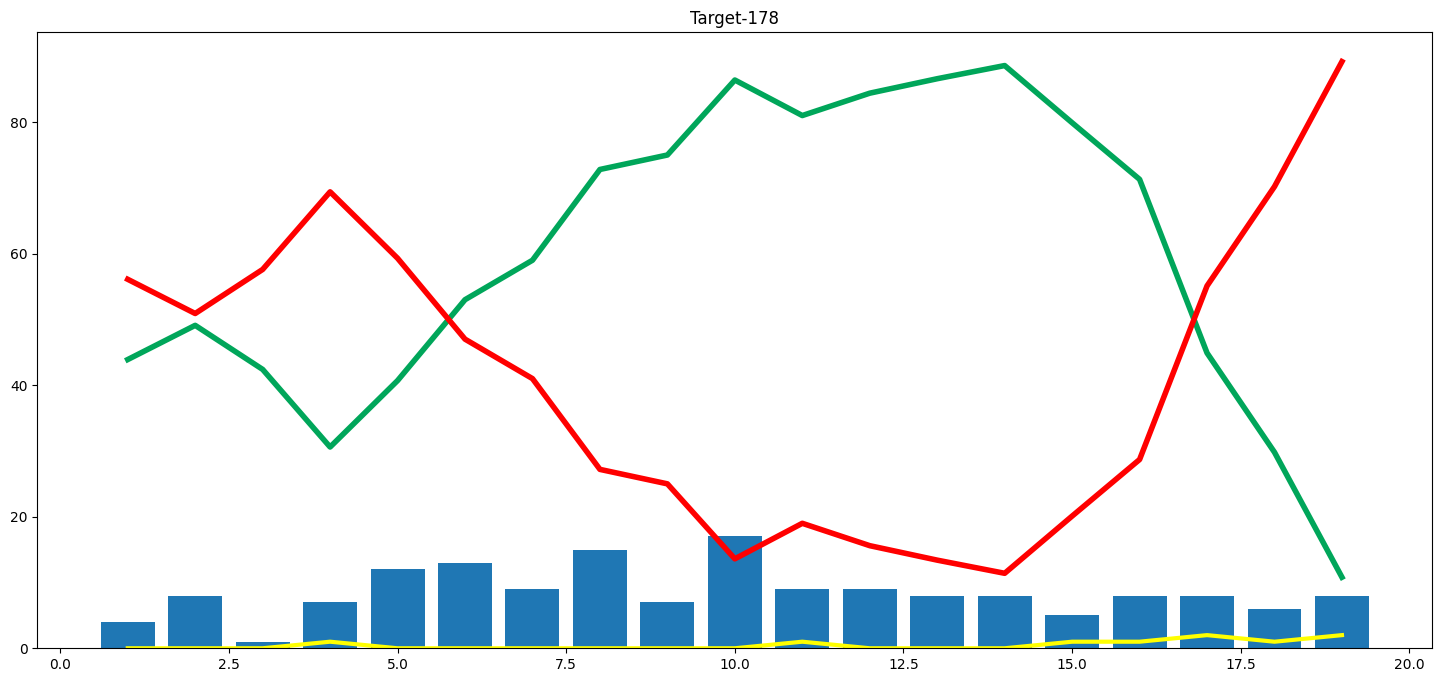

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [155]:
teams


['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [157]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [158]:
import pickle
pickle.dump(pipe,open('matchwinpredictormodel(pip).pkl','wb'))
    